In [1]:
import numpy as np
from matplotlib import pyplot as plt

Maximum dimension to compute

In [2]:
MAX = 12

Dimension, codimension, and gap using parameter count. 

$$ Gap = |\text{Parameters in conjugacy group}| - |\text{Parameters in bilinear form}| $$

In [3]:
c = np.linspace(0,MAX+1,MAX+2)
c,d = np.meshgrid(c,c)
gap = (c**2+d**2-1 - c*d*(d+1)/2)

Same as above, but continuous. Used to plot the continuous red line below

In [4]:
c2 = np.linspace(-1,MAX+1,1000)
c2,d2 = np.meshgrid(c2,c2)
gap2 = (c2**2+d2**2-1 - c2*d2*(d2+1)/2)

Plot the matrix

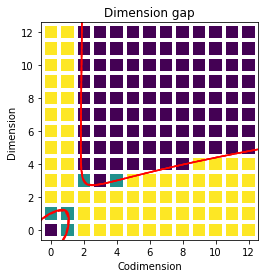

In [5]:
plt.pcolormesh(c-.5,d-.5,(gap>0)+0.+(gap>=0), edgecolors='w', linewidth=3)
plt.contour(c2,d2,gap2,[-.05,0,.05], colors='r')

plt.axis('scaled'), plt.title('Dimension gap')
plt.xlim(-.6,MAX+.6),      plt.ylim(-.6,MAX+.6)
plt.xlabel('Codimension'), plt.ylabel('Dimension')

plt.savefig('finite_parameters.png',dpi=200)

Construct random biliear forms and random matrices for the rank computation

In [31]:
def randomNormal(n):
    return  np.random.normal(size=(n,n))
    
def randomSymmetric(n):
    M = randomNormal(n)
    return (M+M.T)/2

Monte-Carlo version of the method above. The algoritm is the following:

* Start with a random bilinear form
* Choose enough random directions on the (tangent of the) linear group acting
* Compute the derivative of the group action in that direction
* Check the rank of the matrix built with those derivatives (more precisely if they have full rank)

In [149]:
def rank_deficit(cod,dim):
    result = []
    mats = np.array([randomSymmetric(dim) for i in range(cod)])
    for i in range(dim*(dim+1)*cod):
        MOut = randomNormal(cod)
        MIn = randomNormal(dim)
        #original nonlinear "abc,eb,fc,ad->def", mats,MIn,MIn,MOut
        res = np.einsum("abc,eb->aec", mats, MIn) +\
              np.einsum("abc,fc->abf", mats, MIn) +\
              np.einsum("abc,ad->dbc", mats, MOut) 
        result.append(res.flatten())

    return np.linalg.matrix_rank(result)-dim*(dim+1)/2.*cod

Iterate the code above - should be self-explanatory

In [157]:
defs = [[rank_deficit(cod,dim)  for cod in range(13)] for dim in range(13)]

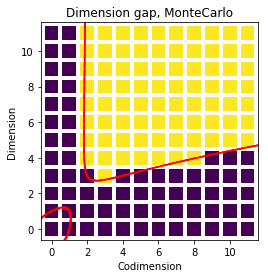

In [163]:
gap = -np.array(defs)
c = np.linspace(0,12,13)
c,d = np.meshgrid(c,c)

plt.pcolormesh(c-.5,d-.5,(gap>0)+0.+(gap>=0), edgecolors='w', linewidth=3)
plt.contour(c2,d2,gap2,[-.05,0,.05], colors='r')
plt.axis('scaled'), plt.title('Dimension gap, MonteCarlo')
plt.xlim(-.6,11+.6),      plt.ylim(-.6,11+.6)
plt.xlabel('Codimension'), plt.ylabel('Dimension')

plt.savefig('finite_parameters_MC.png',dpi=200)